# Univariate Linear Regression (California Housing Dataset)

More info on dataset: https://github.com/ageron/handson-ml/tree/master/datasets/housing

## Load libraries

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt

## Load dataset

In [8]:
dataset = fetch_california_housing()

df = pd.DataFrame(data= np.c_[dataset.data, 100000*dataset.target],
                     columns = dataset.feature_names + ['target'])

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


## Multivariate Linear Regression

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['target'], axis=1).values,
    df['target'],
    test_size=0.2,
    random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression

multiLR = LinearRegression(n_jobs=-1, normalize=True).fit(X_train, y_train)
y_pred = multiLR.predict(X_test)

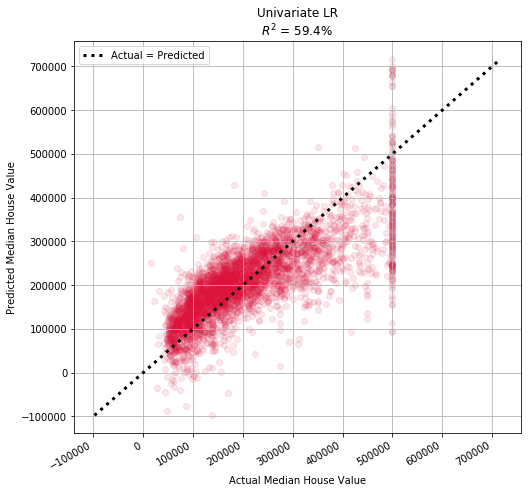

In [32]:
from sklearn.metrics import r2_score

fig = plt.figure(figsize=(8,8))

minv = min(y_test.min(), y_pred.min())
maxv = max(y_test.max(), y_pred.max())

plt.scatter(y_test, y_pred, alpha=0.1, c='crimson')
plt.plot([minv, maxv], [minv, maxv], c='k', linestyle=':', linewidth=3, label='Actual = Predicted')

plt.title('Univariate LR\n$R^2$ = {:.1f}%'.format(100*r2_score(y_test, y_pred)))
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')

plt.grid()
plt.legend()

fig.autofmt_xdate()
plt.show()